In [28]:
import pandas as pd

In [ ]:
pacientes = pd.read_csv('./Pacientes2.csv', index_col=0)

pacientes.head()

,Enfermedad,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,,
1,NO,0,0,1,0,0,38,0,0,0,0
2,SI,0,1,1,1,1,49,1,0,0,0
3,SI,1,1,0,1,1,59,1,0,0,1
4,NO,1,1,0,0,0,44,0,0,0,0
5,NO,0,0,1,0,0,42,0,0,0,0


In [30]:
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 1 to 909
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Enfermedad  985 non-null    object
 1   HIPERTEN    985 non-null    int64 
 2   HIPERGLU    985 non-null    int64 
 3   HDLBAJA     985 non-null    int64 
 4   HIPERTRI    985 non-null    int64 
 5   CINTALTA    985 non-null    int64 
 6   EDAD        985 non-null    int64 
 7   GENERO      985 non-null    int64 
 8   FUMA        985 non-null    int64 
 9   ALCOHOL     985 non-null    int64 
 10  POLIURIA    985 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 92.3+ KB


In [31]:
X = pacientes.iloc[:,1:11]

y = pacientes.iloc[:,0]

X.head()

,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,
1,0,0,1,0,0,38,0,0,0,0
2,0,1,1,1,1,49,1,0,0,0
3,1,1,0,1,1,59,1,0,0,1
4,1,1,0,0,0,44,0,0,0,0
5,0,0,1,0,0,42,0,0,0,0


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

X_train.shape

(738, 10)

In [33]:
X_test.shape

(247, 10)

In [34]:
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier()

arbol_enfermedad = arbol.fit(X_train, y_train)

<function matplotlib.pyplot.show(close=None, block=None)>

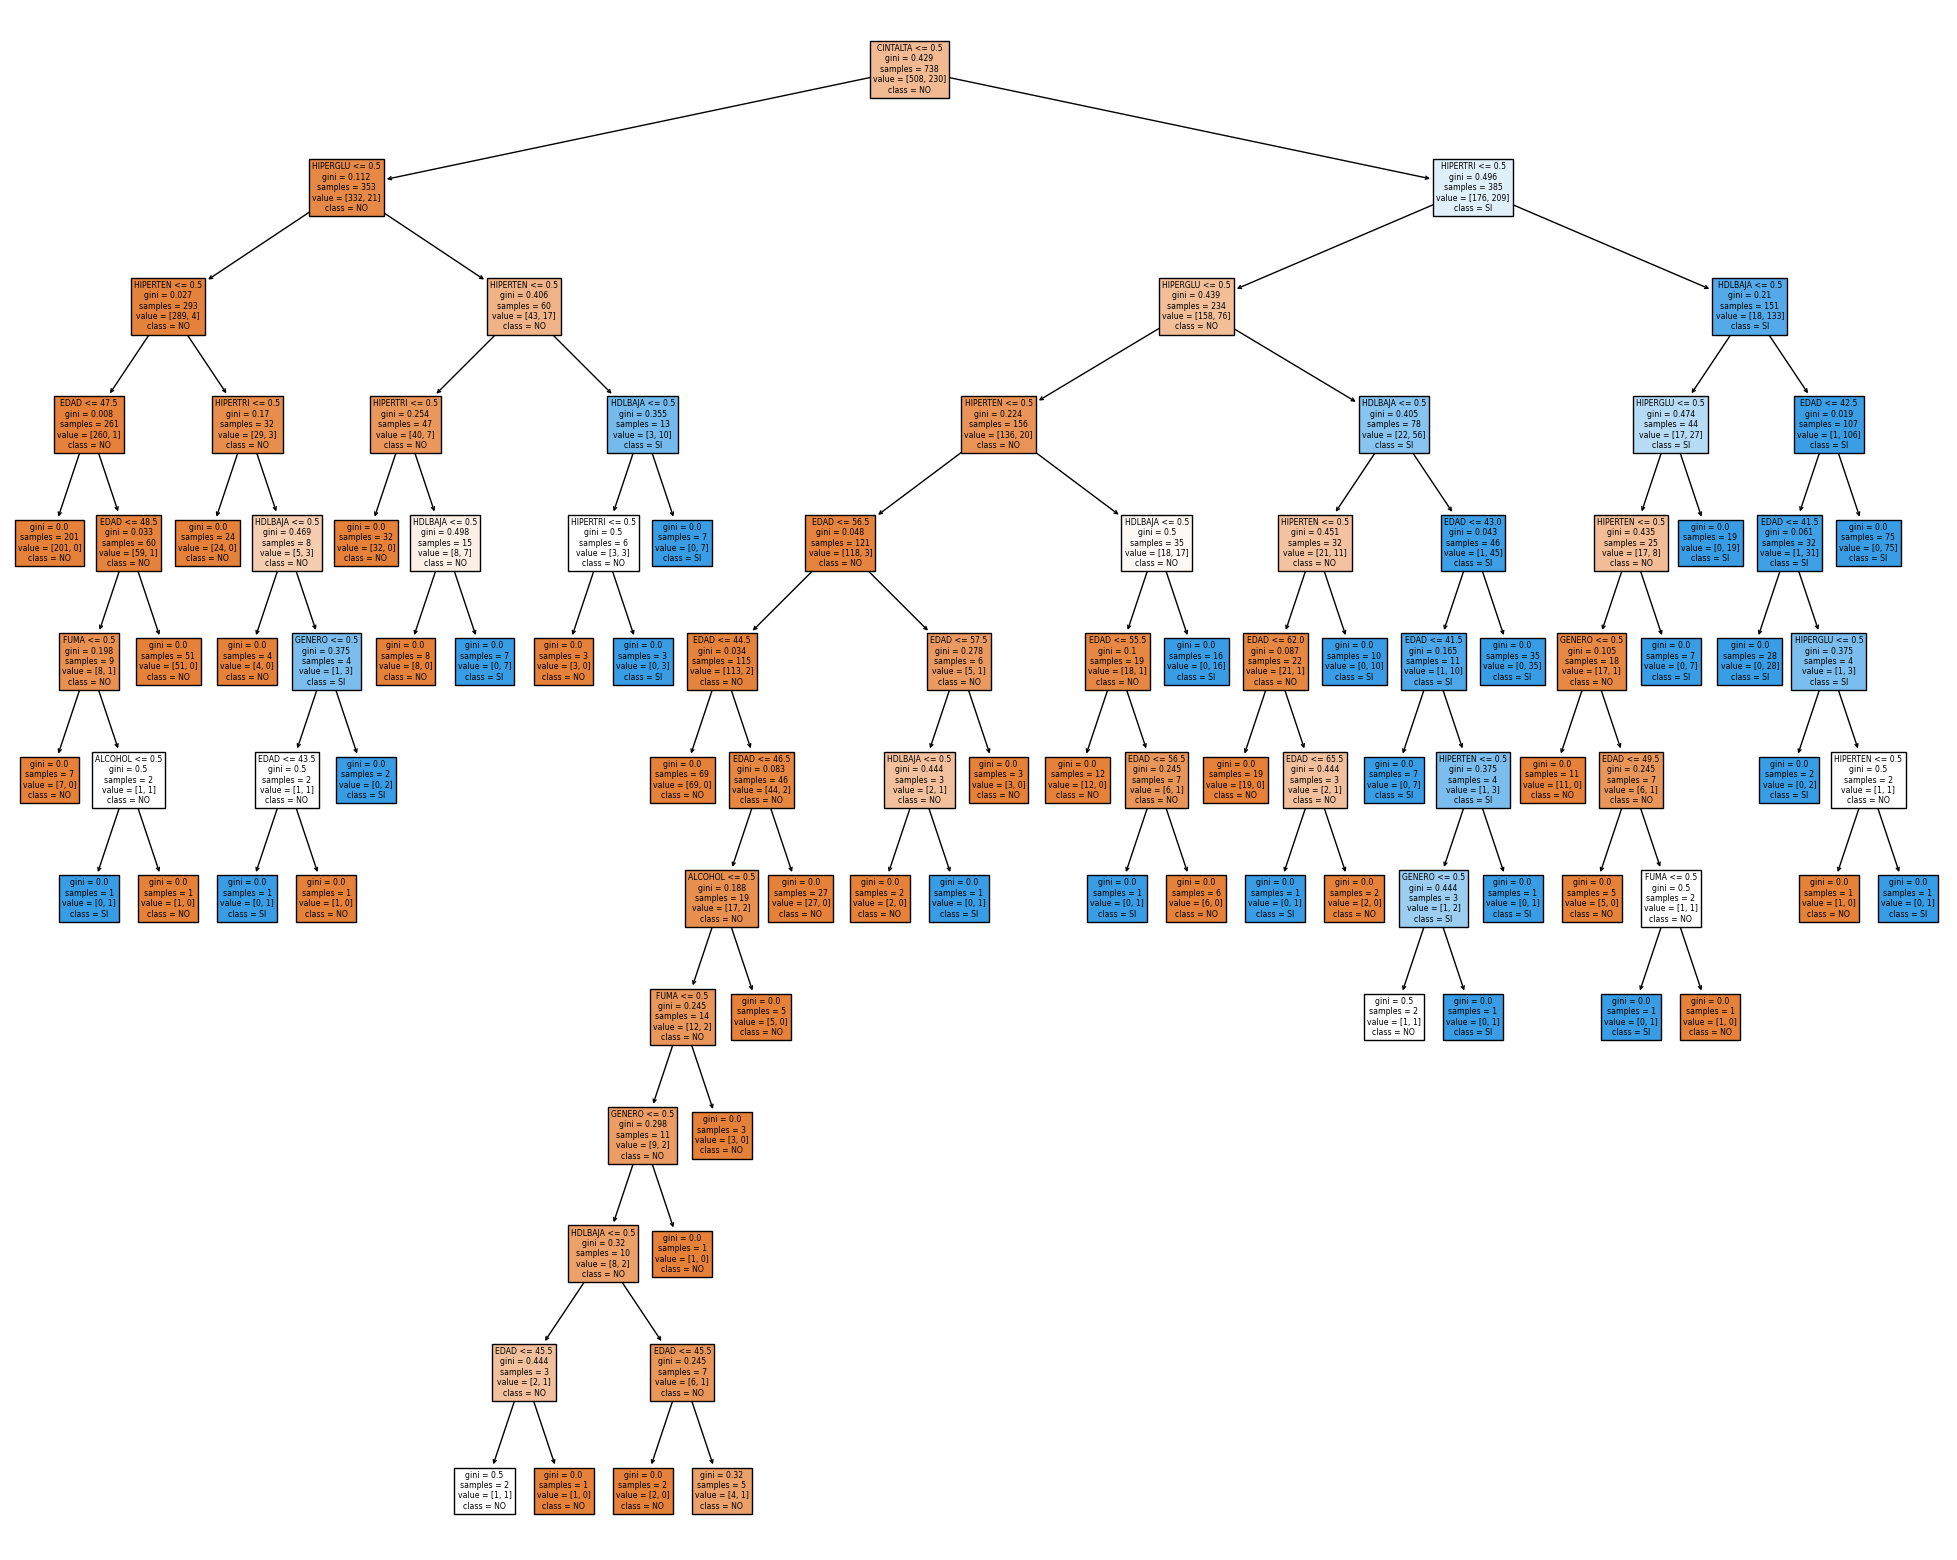

In [35]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol_enfermedad, feature_names= list(X.columns.values), class_names= list(y.values), filled= True)
plt.show

In [36]:
fig.savefig('Arbol.jpg')

In [37]:
y_pred_test = arbol_enfermedad.predict(X_test)

y_pred_test

array(['SI', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'SI', 'NO', 'SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI', 'NO', 'NO',
       'SI', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'SI', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI',
       'NO', 'SI', 'SI', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI',
       'NO', 'NO', 'SI', 'NO', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'N

In [38]:
from sklearn.metrics import confusion_matrix

MC = confusion_matrix(y_test, y_pred_test)

MC

array([[176,   5],
       [  0,  66]], dtype=int64)

In [39]:
import numpy as np

Accuracy_test = np.sum(MC.diagonal()) / np.sum(MC)

Accuracy_test

0.979757085020243

In [40]:
Acc_NO = MC[0,0] / sum(MC[0,])

Acc_NO

0.9723756906077348

In [41]:
Acc_Si = MC[1,1] / sum(MC[1,])

Acc_Si

1.0

In [42]:
from sklearn.tree import DecisionTreeClassifier

arbol4 = DecisionTreeClassifier(max_depth=4)

arbol4_enfermedad = arbol4.fit(X_train, y_train)

<function matplotlib.pyplot.show(close=None, block=None)>

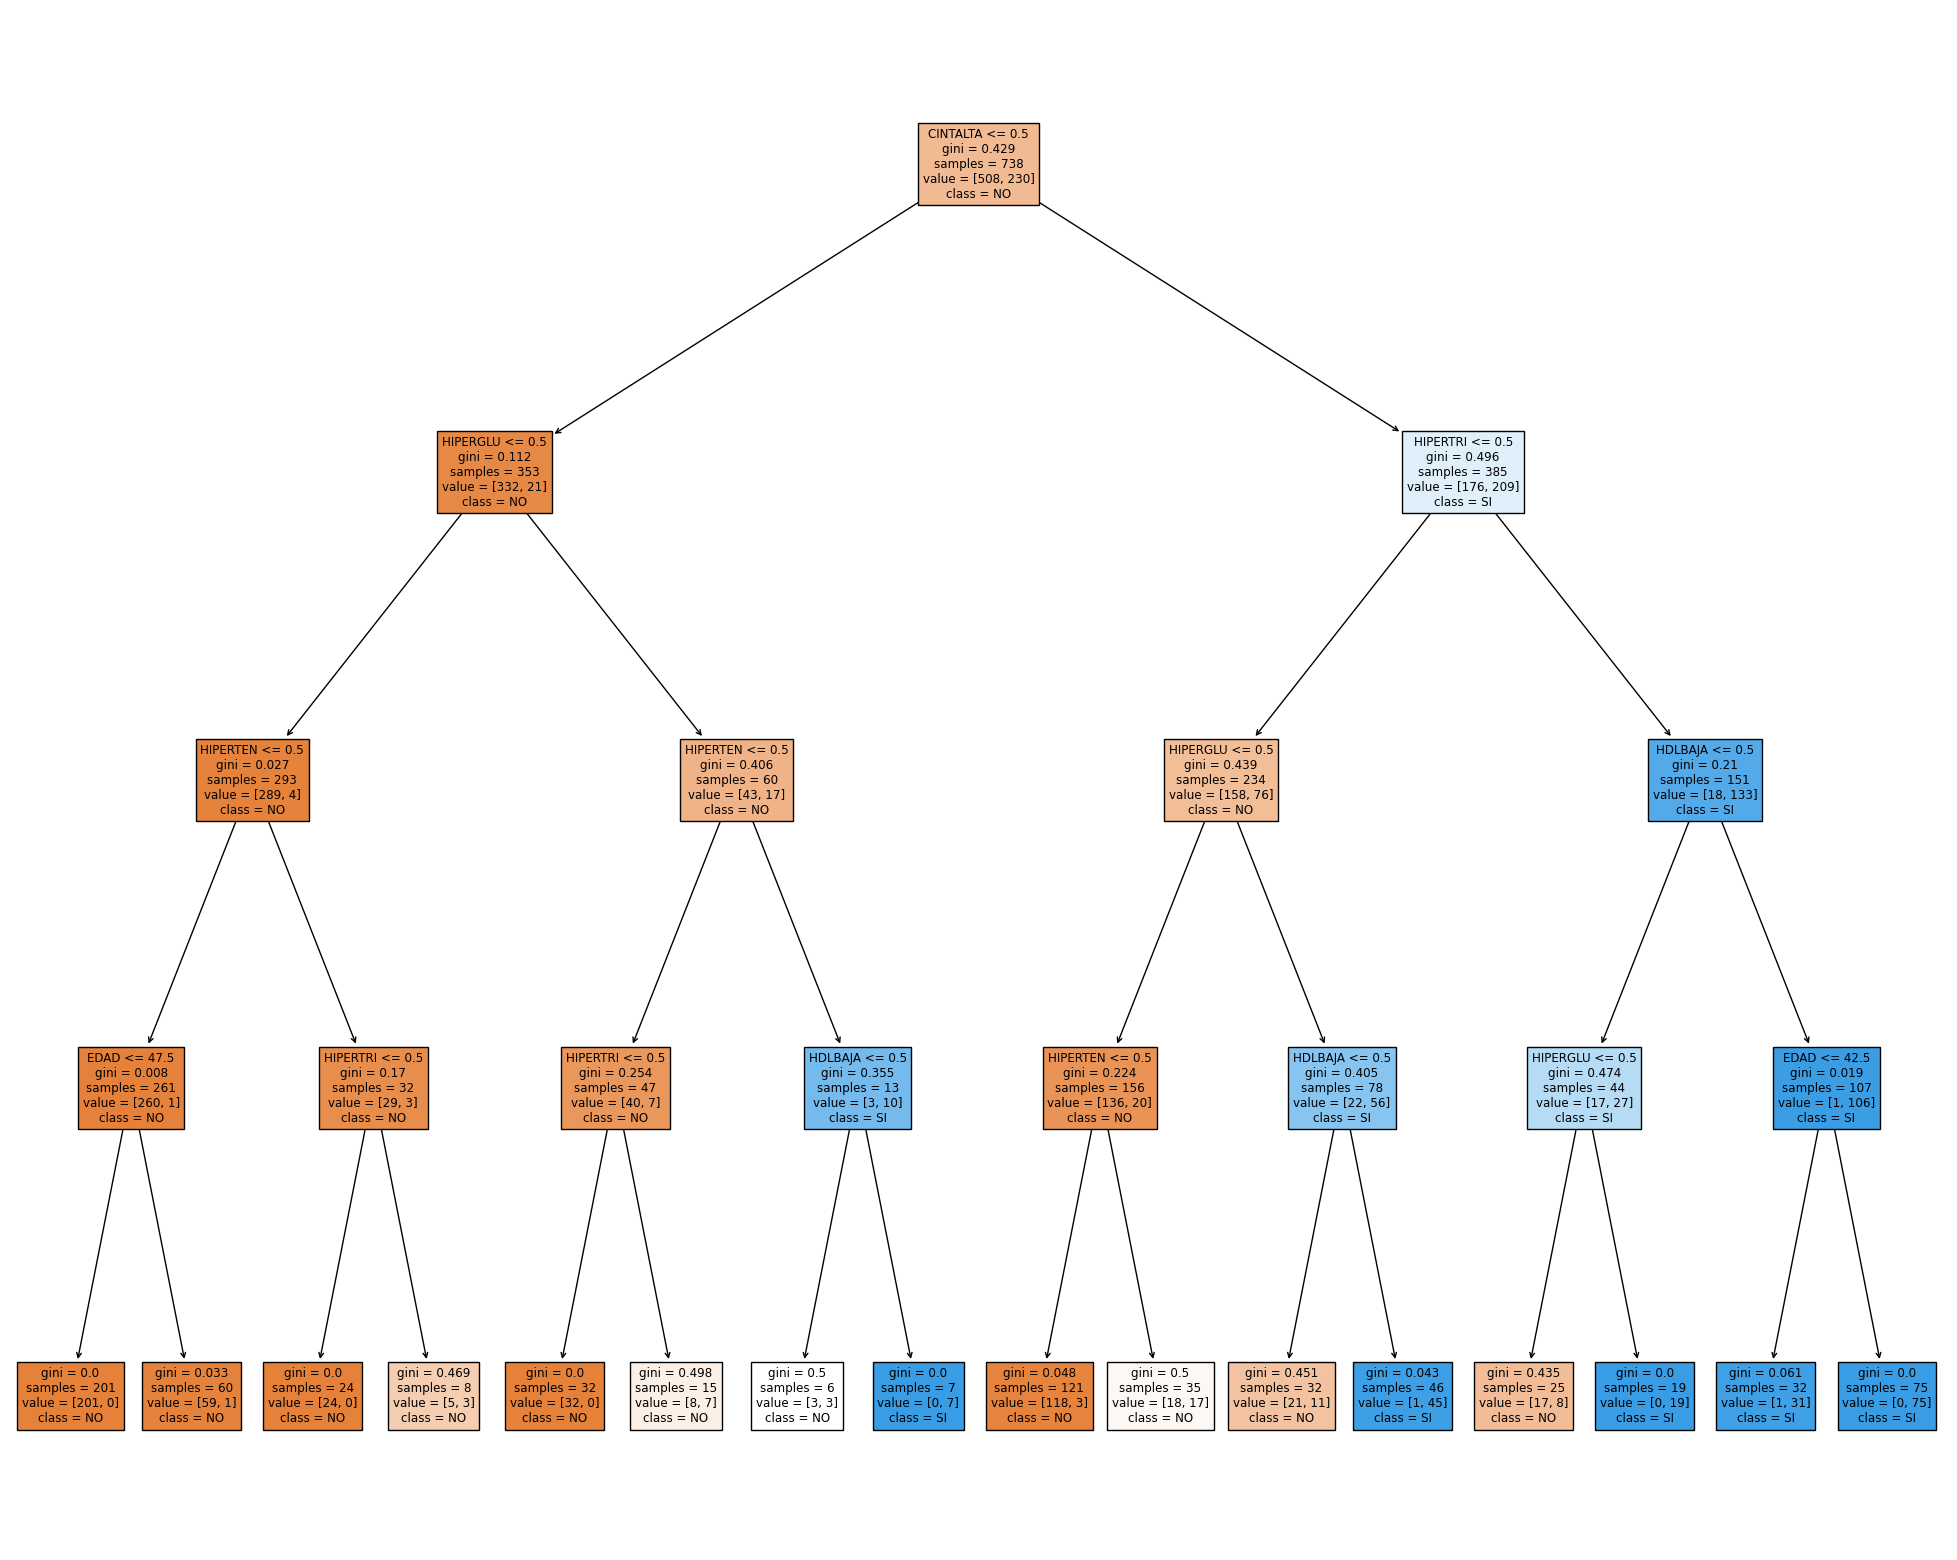

In [43]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol4_enfermedad, feature_names= list(X.columns.values), class_names= list(y.values), filled= True)
plt.show

In [44]:
y_pred_test = arbol4_enfermedad.predict(X_test)

y_pred_test

array(['SI', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'SI', 'NO', 'SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI', 'NO', 'NO',
       'SI', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI',
       'NO', 'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI',
       'NO', 'NO', 'SI', 'NO', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'N

In [45]:
from sklearn.metrics import confusion_matrix

MC = confusion_matrix(y_test, y_pred_test)

MC

array([[178,   3],
       [ 12,  54]], dtype=int64)

In [46]:
import numpy as np

Accuracy_test = np.sum(MC.diagonal()) / np.sum(MC)

Accuracy_test

0.9392712550607287

In [47]:
Acc_NO = MC[0,0] / sum(MC[0,])

Acc_NO

0.9834254143646409

In [48]:
Acc_Si = MC[1,1] / sum(MC[1,])

Acc_Si

0.8181818181818182

In [49]:
from sklearn.tree import DecisionTreeClassifier

arbol4 = DecisionTreeClassifier(max_leaf_nodes=25)

arbol4_enfermedad = arbol4.fit(X_train, y_train)

<function matplotlib.pyplot.show(close=None, block=None)>

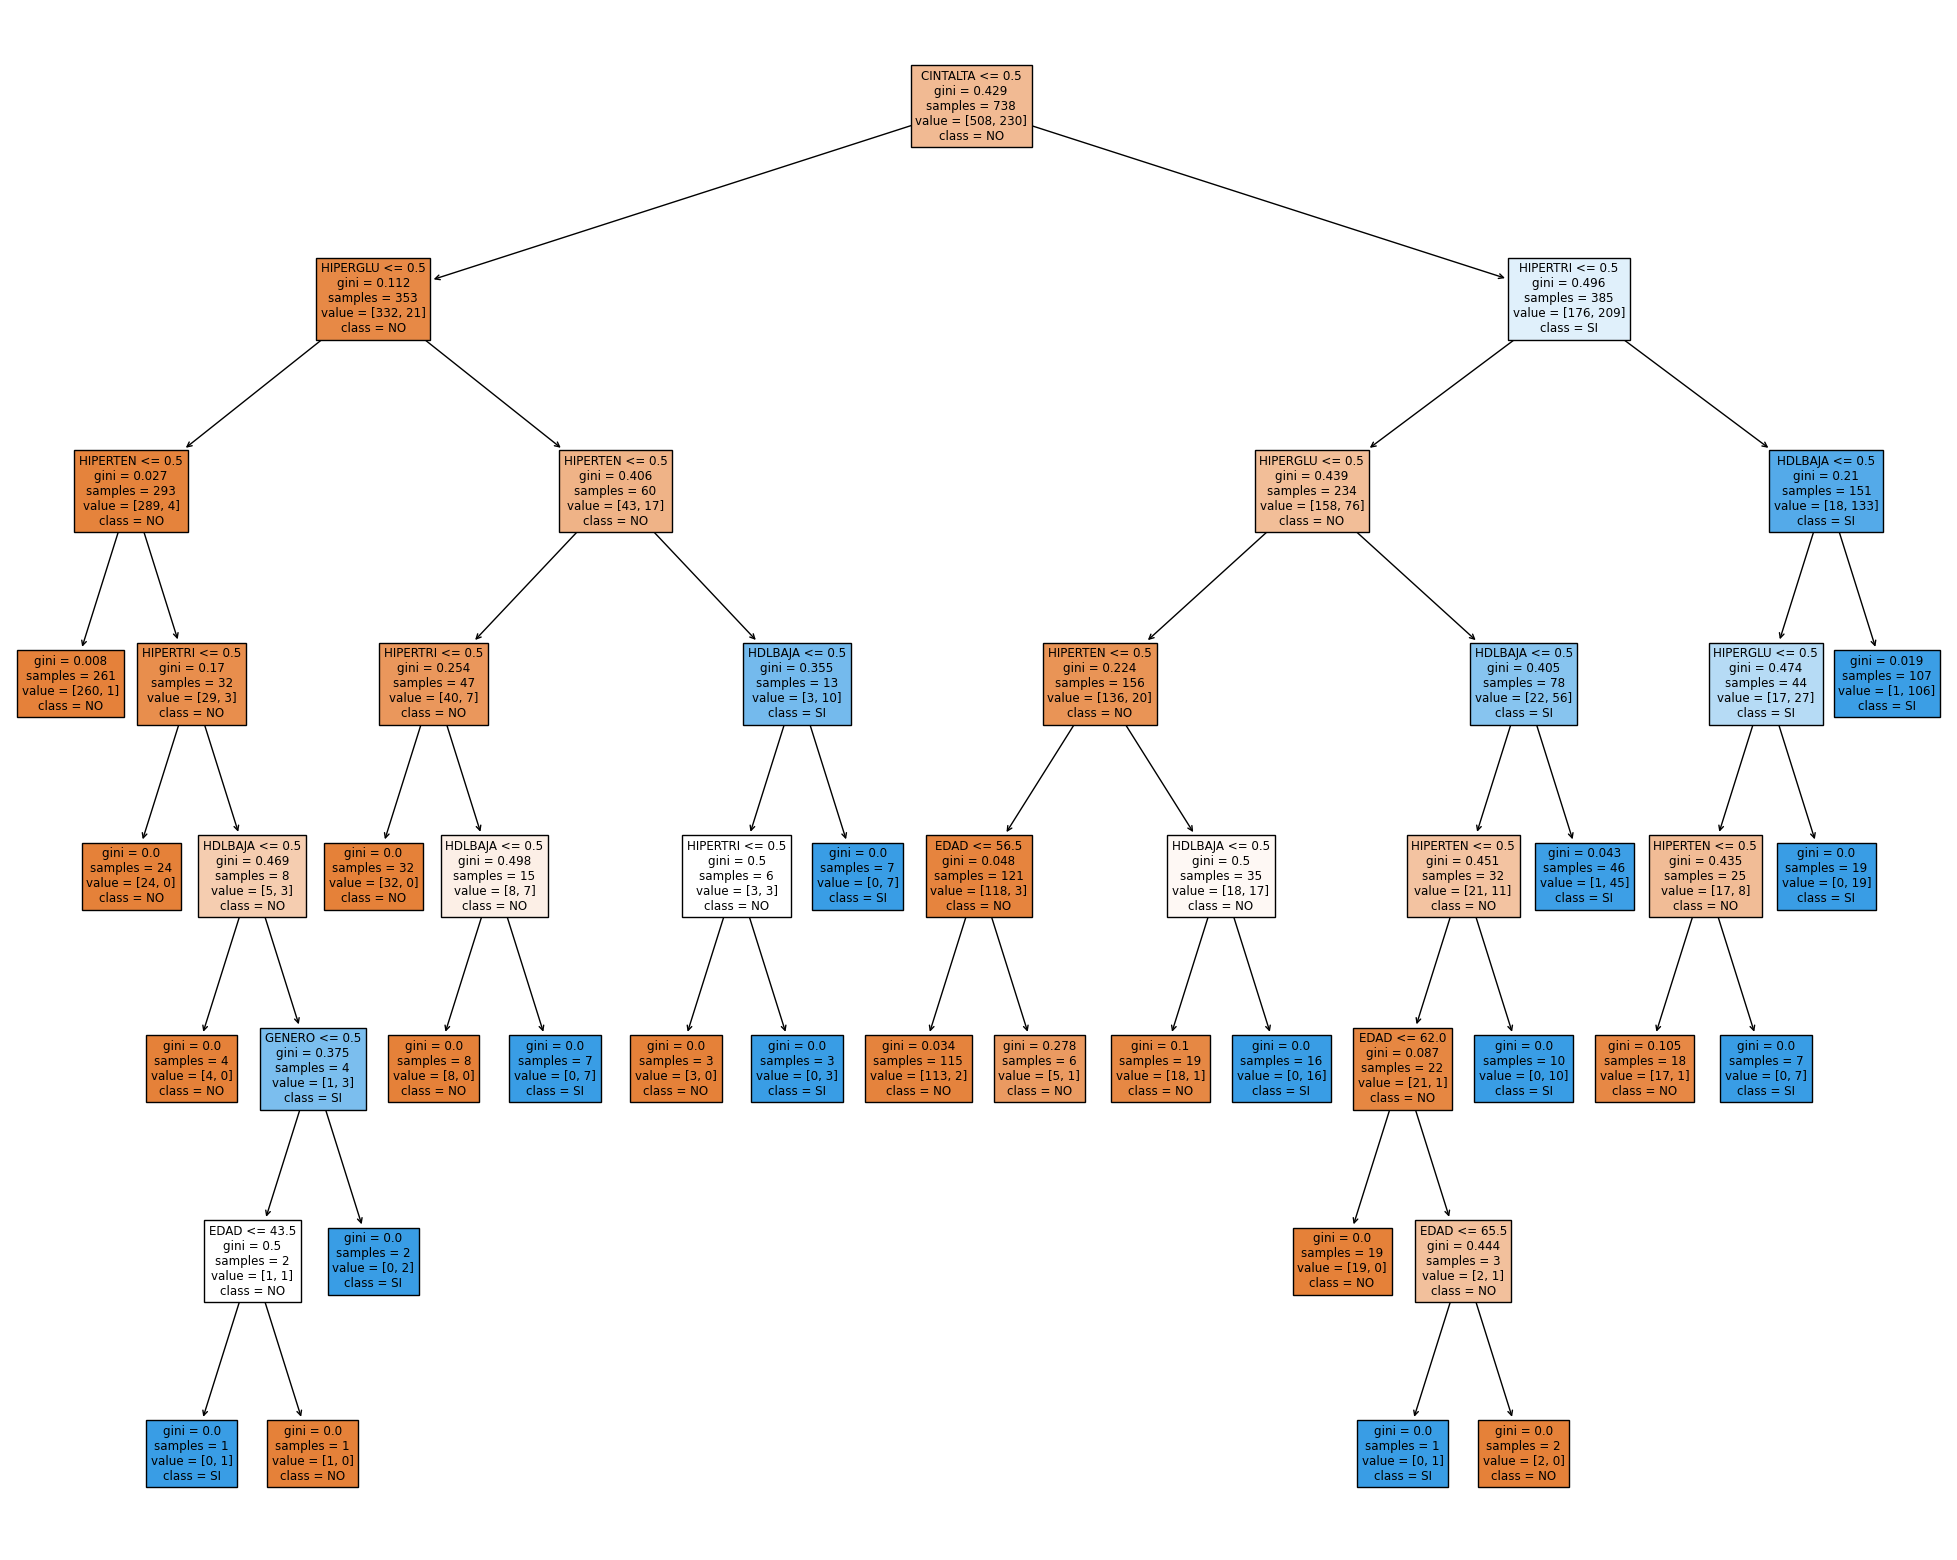

In [50]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol4_enfermedad, feature_names= list(X.columns.values), class_names= list(y.values), filled= True)
plt.show

In [51]:
y_pred_test = arbol4_enfermedad.predict(X_test)

y_pred_test

array(['SI', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'SI', 'NO', 'SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI', 'NO', 'NO',
       'SI', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'SI', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI',
       'NO', 'SI', 'SI', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI',
       'NO', 'NO', 'SI', 'NO', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'N

In [52]:
from sklearn.metrics import confusion_matrix

MC = confusion_matrix(y_test, y_pred_test)

MC

array([[178,   3],
       [  0,  66]], dtype=int64)

In [53]:
import numpy as np

Accuracy_test = np.sum(MC.diagonal()) / np.sum(MC)

Accuracy_test

0.9878542510121457

In [54]:
Acc_NO = MC[0,0] / sum(MC[0,])

Acc_NO

0.9834254143646409

In [55]:
Acc_Si = MC[1,1] / sum(MC[1,])

Acc_Si

1.0